<a href="https://colab.research.google.com/github/ereneris/STM32F4/blob/main/MNIST_Say%C4%B1_Tahmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Yapay Zeka Uygulamaları
# MNİst Sayı Tahmini
> Bu çalışma İle EEN Sinir ağlarını Kullanarak MNİST Datasetinden sayı tahminlemesi yapılmıtır. Toplamda 7 Epoch Çalışılmış ve alınan sonuçlar aşağıdadır.

**Epoch 1/7**  loss: 0.3586 - precision_1: 0.9488 - recall_1: 0.8490 - accuracy: 0.9024 - val_loss: 0.1946 - val_precision_1: 0.9579 - val_recall_1: 0.9333 - val_accuracy: 0.9454

**Epoch 2/7** loss: 0.1643 - precision_1: 0.9644 - recall_1: 0.9423 - accuracy: 0.9529 - val_loss: 0.1392 - val_precision_1: 0.9665 - val_recall_1: 0.9519 - val_accuracy: 0.9594

**Epoch 3/7** loss: 0.1180 - precision_1: 0.9736 - recall_1: 0.9599 - accuracy: 0.9667 - val_loss: 0.1106 - val_precision_1: 0.9729 - val_recall_1: 0.9616 - val_accuracy: 0.9667

**Epoch 4/7** loss: 0.0914 - precision_1: 0.9789 - recall_1: 0.9695 - accuracy: 0.9739 - val_loss: 0.0967 - val_precision_1: 0.9764 - val_recall_1: 0.9670 - val_accuracy: 0.9704

**Epoch 5/7** loss: 0.0736 - precision_1: 0.9826 - recall_1: 0.9751 - accuracy: 0.9788 - val_loss: 0.0879 - val_precision_1: 0.9771 - val_recall_1: 0.9693 - val_accuracy: 0.9721

**Epoch 6/7** loss: 0.0595 - precision_1: 0.9860 - recall_1: 0.9802 - accuracy: 0.9829 - val_loss: 0.0835 - val_precision_1: 0.9787 - val_recall_1: 0.9716 - val_accuracy: 0.9748

**Epoch 7/7** loss: 0.0507 - precision_1: 0.9880 - recall_1: 0.9829 - accuracy: 0.9854 - val_loss: 0.0722 - val_precision_1: 0.9811 - val_recall_1: 0.9752 - val_accuracy: 0.9774

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model , Sequential
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.utils import to_categorical , plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print("Egitim Veri Seti:",x_train.shape,y_train.shape)
print("Öğrenme Veri Seti:",x_test.shape,y_test.shape)

Egitim Veri Seti: (60000, 28, 28) (60000,)
Öğrenme Veri Seti: (10000, 28, 28) (10000,)


In [5]:
num_labels = len(np.unique(y_train))

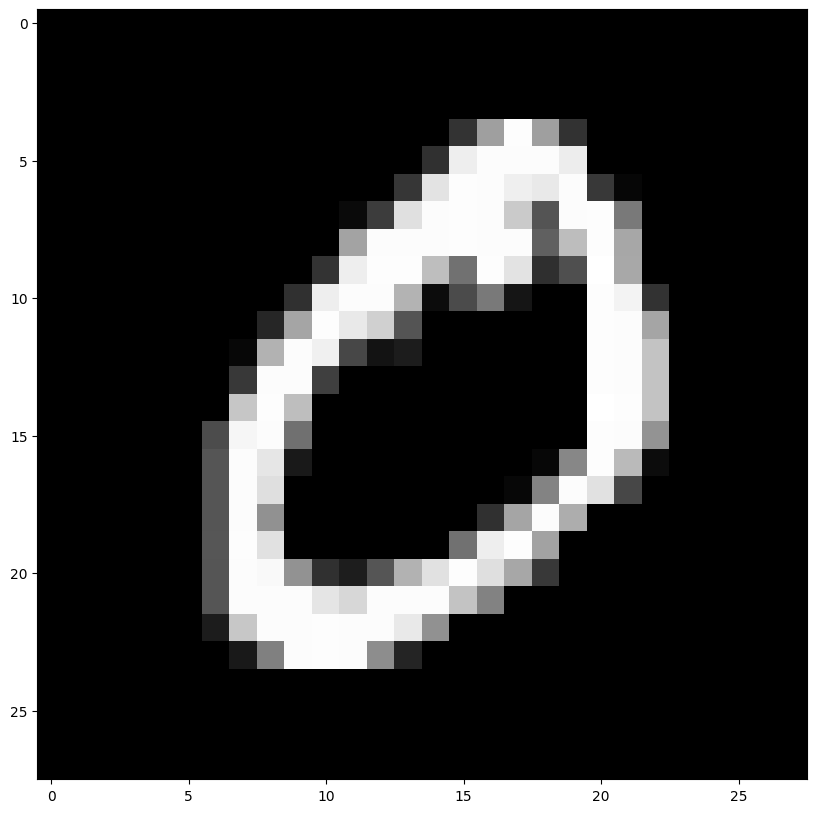

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[1],cmap='gray')

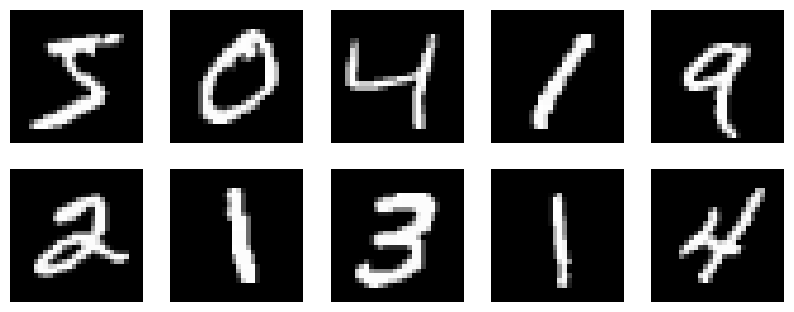

In [7]:
plt.figure(figsize=(10,10))
for n in range(10):
  ax = plt.subplot(5,5,n+1)
  plt.imshow(x_train[n],cmap='gray')
  plt.axis('off')

In [8]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')
  width , height = img.shape

  threshold = img.max() / 2.5

  for x in range (width):
    for y in range(height):
      ax.annotate(str(round(img[x][y],2)),xy=(y,x),color='white' if img[x][y]<threshold else 'black')

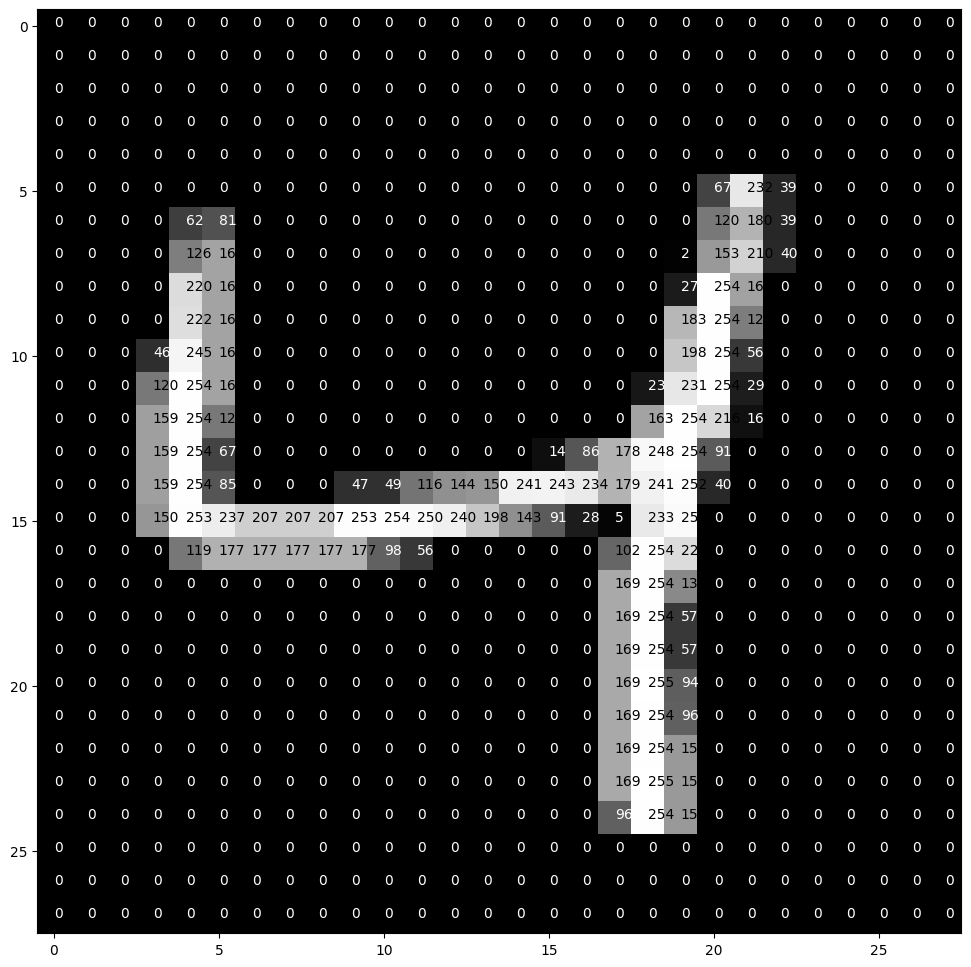

In [9]:
pixel_visualize(x_train[2])

In [10]:
## Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
image_size = x_train.shape[1]

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [15]:
from keras.api._v2.keras import activations
from pyparsing import actions
##Sinir Ağı Mimarisi Tanımlama
model = tf.keras.Sequential([
     Flatten(input_shape=(28,28,1)), #Giriş Katmanu Oluşturuyoruz
     Dense(units=128,activation='relu',name='layer1'), #Gizli Katmanı Oluşturduk ve Aktivasyon Fonksiyonu olarak Relu Yap Dedik
     Dense(units=num_labels,activation='softmax',name='output_layer')]) #Çıkış Katmanı Oluşturduk ve Aktivasyon Fonksiyonu olarak Softmax Yap Dedik. Çünkü Sayının 1 değere yakınsaması gerek

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train,y_train,epochs=7,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/7
469/469 [==============================] - 8s 5ms/step - loss: 0.3586 - precision_1: 0.9488 - recall_1: 0.8490 - accuracy: 0.9024 - val_loss: 0.1946 - val_precision_1: 0.9579 - val_recall_1: 0.9333 - val_accuracy: 0.9454
Epoch 2/7
469/469 [==============================] - 2s 4ms/step - loss: 0.1643 - precision_1: 0.9644 - recall_1: 0.9423 - accuracy: 0.9529 - val_loss: 0.1392 - val_precision_1: 0.9665 - val_recall_1: 0.9519 - val_accuracy: 0.9594
Epoch 3/7
469/469 [==============================] - 3s 6ms/step - loss: 0.1180 - precision_1: 0.9736 - recall_1: 0.9599 - accuracy: 0.9667 - val_loss: 0.1106 - val_precision_1: 0.9729 - val_recall_1: 0.9616 - val_accuracy: 0.9667
Epoch 4/7
469/469 [==============================] - 2s 5ms/step - loss: 0.0914 - precision_1: 0.9789 - recall_1: 0.9695 - accuracy: 0.9739 - val_loss: 0.0967 - val_precision_1: 0.9764 - val_recall_1: 0.9670 - val_accuracy: 0.9704
Epoch 5/7
469/469 [==============================] - 2s 4ms/step - loss: 0.0

In [18]:
model.save('test1.h5')#Model Save

In [19]:
import random

random_index = random.randint(0, x_test.shape[0])
random_index

4960

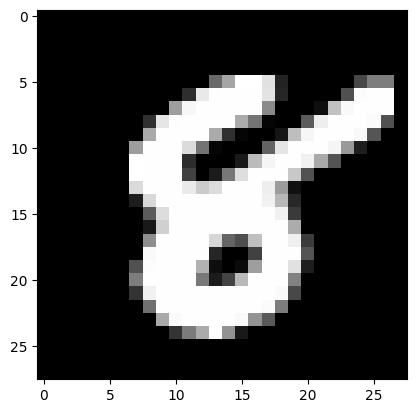

In [20]:
test_image = x_test[random_index]
y_test[random_index]
plt.imshow(test_image.reshape(28,28),cmap='gray')

In [21]:
test_data = x_test[random_index].reshape(1,28,28,1)
probability = model.predict(test_data)

1/1 [==============================] - 0s 76ms/step


In [22]:
probability

array([[1.3949255e-09, 1.7537202e-14, 1.7145911e-08, 6.1783961e-10,
        6.4670944e-09, 1.9368683e-06, 8.3097319e-08, 1.6517420e-12,
        9.9999797e-01, 5.8476923e-10]], dtype=float32)

In [23]:
predicted_classes = np.argmax(probability)
predicted_classes

8